In [0]:
# importing the required libraries and loading the dataset 
import dask.dataframe as dd
import pandas as pd
import numpy as np
%time df = dd.read_csv('CleanDataset.csv',header=0, encoding='utf-8')

CPU times: user 24.4 ms, sys: 6.06 ms, total: 30.4 ms
Wall time: 40.2 ms


In [0]:
##having a look at the head of the dataset
df.head()

,S_avg,Ds_avg,Ws_avg,Ot_avg
0,3.09000,88.180000,1.90,5.30
1,1.81000,23.010000,0.20,4.89
2,1.89000,38.110001,0.18,4.80
3,177.53000,1181.700000,5.04,1.79
4,191.96001,1200.480000,5.31,0.85


In [0]:
#Describing the dataset
df.describe()

,S_avg,Ds_avg,Ws_avg,Ot_avg
npartitions=1,,,,
,float64,float64,float64,float64
,...,...,...,...


In [0]:
#Checking the null values in the dataset

df.isnull().sum().compute()

S_avg     0
Ds_avg    0
Ws_avg    0
Ot_avg    0
dtype: int64

In [0]:
categorical_variables = df[['S_avg','Ws_avg','Ot_avg']]


In [0]:
target = df[['Ds_avg']]

In [0]:
data = dd.get_dummies(categorical_variables.categorize()).compute()

In [0]:
datanew =data.values
datanew = datanew.astype('float32')
datanew = np.nan_to_num(datanew)

In [0]:
! pip install dask-ml

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
#Fitting the model 

from dask_ml.cluster import KMeans
model = KMeans()
model.fit(datanew, target)

KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=None,
    max_iter=300, n_clusters=8, n_jobs=1, oversampling_factor=2,
    precompute_distances='auto', random_state=None, tol=0.0001)

In [0]:
#Calling required libraries for plotting
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

import os                     # For os related operations
import sys                    # For data size

In [0]:
print("Dimension of dataset: df.shape")
df.shape
df.dtypes

Dimension of dataset: df.shape


S_avg     float64
Ds_avg    float64
Ws_avg    float64
Ot_avg    float64
dtype: object

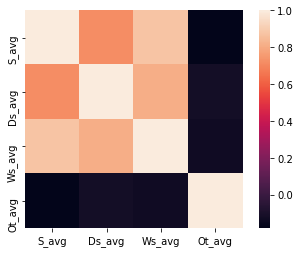

In [0]:
#Generating the heatmap of correaltion of the variables

xlabels=['S_avg','Ds_avg','Ws_avg','Ot_avg'];
df1 = df[['S_avg','Ds_avg','Ws_avg','Ot_avg']]
#Subsetting the data
cor = df1.corr() #Calculate the correlation of the above variables
ax=sns.heatmap(cor, square = True,xticklabels=xlabels,yticklabels=xlabels)#Plot the correlation as heat map
type(xlabels)

plt.show()


In [0]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df1)

array([[-0.80567315, -1.7369431 , -1.38288917, -0.82379925],
       [-0.80858017, -1.84803364, -2.04230458, -0.89064674],
       [-0.80839848, -1.82229377, -2.0500624 , -0.90532051],
       ...,
       [ 0.32883452,  0.72607236,  0.47123172, -1.58683827],
       [ 1.64139658,  1.16288302,  1.24701475, -1.42868703],
       [-0.55914473, -0.07450551, -0.30067208, -1.56727317]])

In [0]:
#K means Clustering 
def doKmeans(X, nclust=8):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df1, 8)
kmeans = pd.DataFrame(clust_labels)
# df1.insert((df1.shape[1]),'kmeans',kmeans)
df1 = df1.compute()

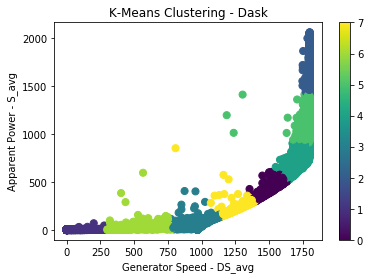

In [0]:
#Plot the clusters obtained using k means
#Ds_avg vs S_avg
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['Ds_avg'],df1['S_avg'],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering - Dask')
ax.set_xlabel('Generator Speed - DS_avg')
ax.set_ylabel('Apparent Power - S_avg')
plt.colorbar(scatter)

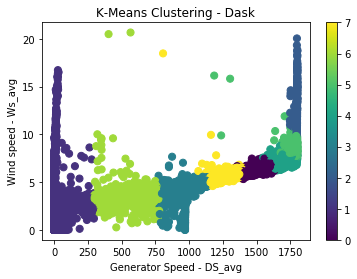

In [0]:
#Plot the clusters obtained using k means
#Ds_avg vs Ws_avg
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['Ds_avg'],df1['Ws_avg'],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering - Dask')
ax.set_xlabel('Generator Speed - DS_avg')
ax.set_ylabel('Wind speed - Ws_avg')
plt.colorbar(scatter)

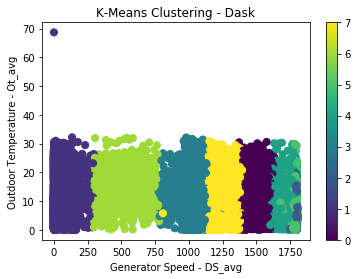

In [0]:
#Plot the clusters obtained using k means
#Ds_avg vs Ot_avg
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['Ds_avg'],df1['Ot_avg'],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering - Dask')
ax.set_xlabel('Generator Speed - DS_avg')
ax.set_ylabel('Outdoor Temperature - Ot_avg')
plt.colorbar(scatter)